In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
data = pd.read_csv('digits.csv')

In [7]:
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
x=data.drop(labels='number_label', axis=1)
y=data['number_label']
x.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

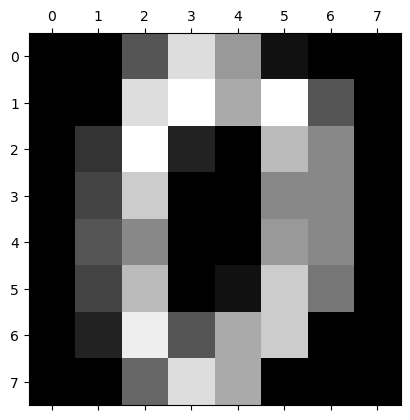

In [13]:
image_data = x.iloc[0].values  
image_reshaped = image_data.reshape(8, 8) 
plt.gray()
plt.matshow(image_reshaped)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

# PCA

## PCA using 2 components

In [22]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 2)

In [24]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [26]:
digits_pca2 = pd.DataFrame(data = X_pca, columns = ['comp1', 'comp2'])
digits_pca2['label'] = y

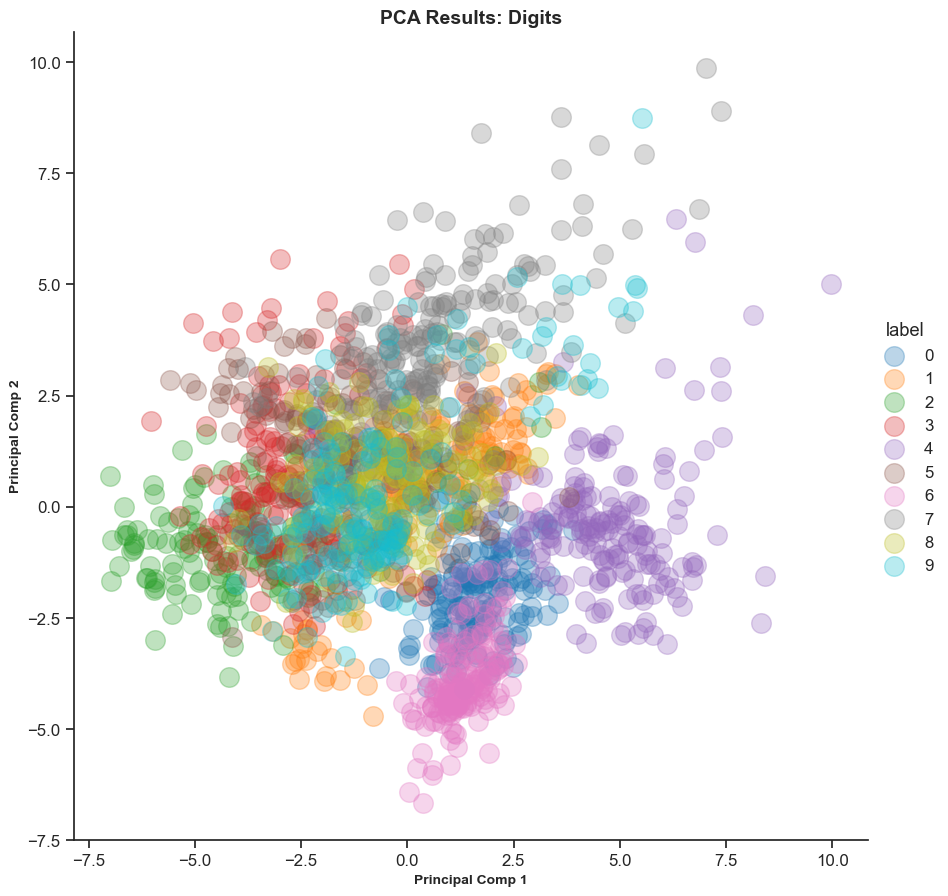

In [36]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

## TSNE using 2 components

In [40]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components = 2)
digits_tsne2 = tsne2.fit_transform(X_scaled)

In [42]:
digits_tsne2 = pd.DataFrame(data = digits_tsne2, columns = ['comp1', 'comp2'])
digits_tsne2['label'] = y

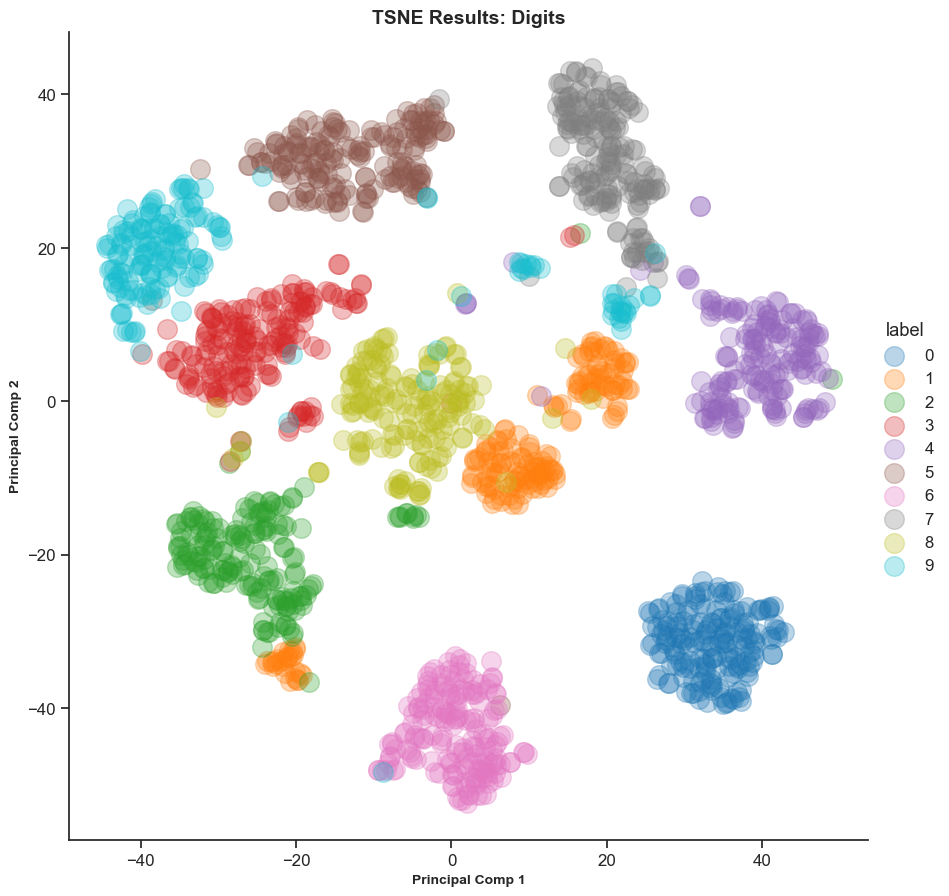

In [44]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_tsne2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('TSNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

## PCA using 3 Components

In [48]:
pca3 = PCA(n_components = 3)
digits_pca3= pca3.fit_transform(X_scaled)

In [52]:
digits_pca3 = pd.DataFrame(data = digits_pca3, columns = ['comp1', 'comp2', 'comp3'])
digits_pca3['label'] = y

In [54]:
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


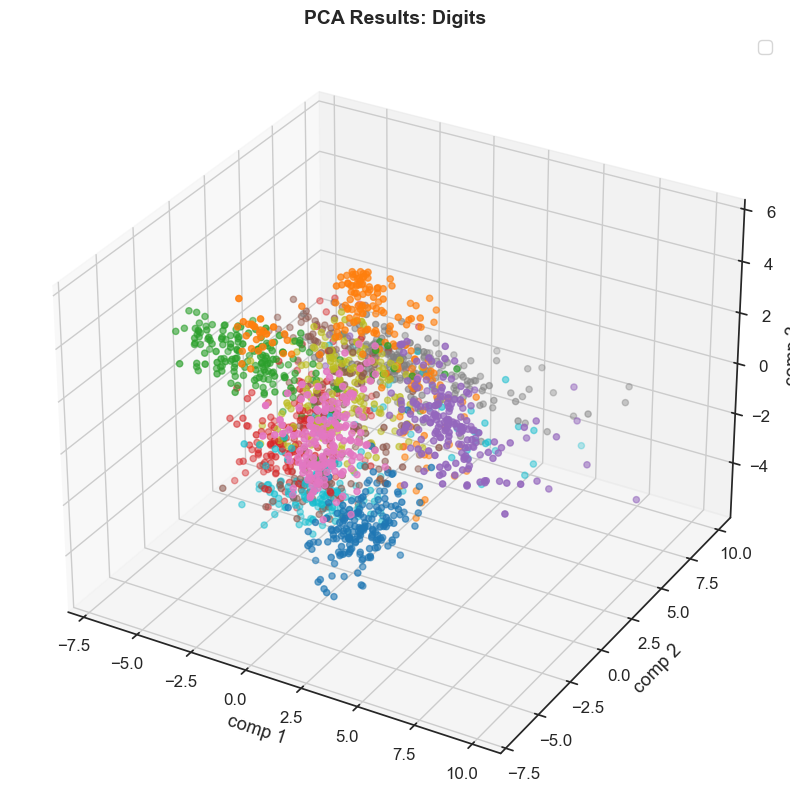

In [56]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'], 
    ys=digits_pca3.loc[:, 'comp2'], 
    zs=digits_pca3.loc[:, 'comp3'], 
    c=digits_pca3.loc[:, 'label'], 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
ax.legend()
plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.show()

## TSNE using 3 Components

In [66]:
tsne3 = TSNE(n_components = 3)
digits_tsne3 = tsne3.fit_transform(X_scaled)

In [68]:
digits_tsne3 = pd.DataFrame(data = digits_tsne3, columns = ['comp1', 'comp2', 'comp3'])
digits_tsne3['label'] = y

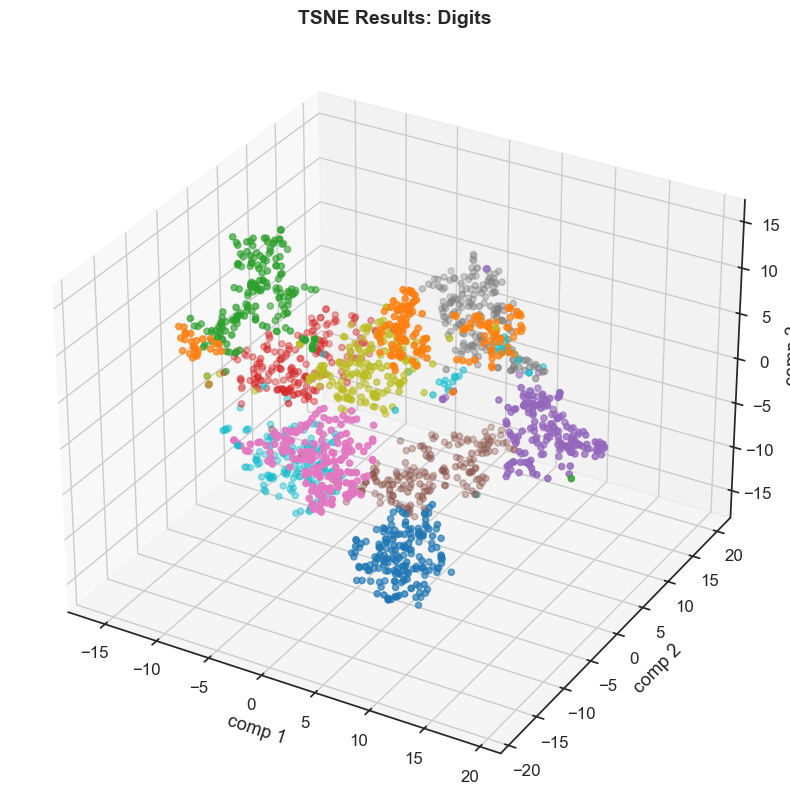

In [70]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_tsne3.loc[:, 'comp1'], 
    ys=digits_tsne3.loc[:, 'comp2'], 
    zs=digits_tsne3.loc[:, 'comp3'], 
    c=digits_tsne3.loc[:, 'label'], 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('TSNE Results: Digits', weight='bold').set_fontsize('14')
plt.show()